# recommendation 

In [0]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler

In [0]:
pca = pca(n_components=1)

### Simulation of data for Recommender system

In [0]:
ts = [random.choice([round(np.random.normal(loc=60,scale=10)) for i in range(40)]+[round(np.random.normal(loc=120,scale=30)) for i in range(10)]+[random.randint(0,20) for i in range(50)]) for i in range(1000)]
freq = [round(random.choice([np.random.normal(loc=5,scale=2) for i in range(10)]+[random.randint(0,1) for i in range(20)])) for i in range(1000)]
df = pd.DataFrame(zip(ts,freq),columns=['ts','freq'])
for i in range(1000):
  if(df['ts'][i]<5):
    df['freq'][i] = 0
  if df['ts'][i] > 80:
    df['freq'][i] = random.choice([1,2,3])
  elif df['ts'][i]>30 and df['ts'][i]<80 :
    df['freq'][i] = random.choice([2,3,4])

In [0]:
df.head()

,ts,freq
0,72,2
1,50,3
2,175,2
3,114,2
4,69,4


ts:time_spent in a store
freq: freq of visiting a store

In [0]:
x = df.values
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)
principalComponents = [i[0] for i in principalComponents]
fdfc = pd.DataFrame(df['freq'].values,columns=['freq'])
pdfc = pd.DataFrame(zip(principalComponents,ts,freq),columns=['pcaval','ts','freq'])

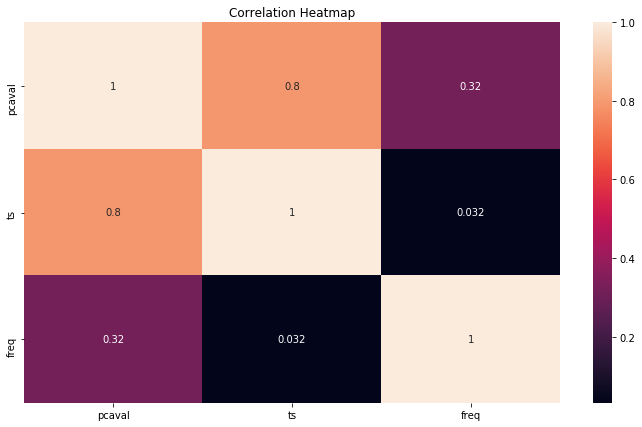

In [0]:
fig1,ax1 = plt.subplots(figsize=(12,7))
sns.heatmap(pdfc.corr(method='spearman'),annot=True)
ax1.set_title('Correlation Heatmap')
plt.show()

### In the data,we have two features time spent and frequency for every user for every store. This creates 3 dimensions. S0, PCA is applied on those two features and a pca value is found.The above correlation heatmap suggests that there is a strong corr btwn pcaval and ts.  

In [0]:
pdf = pd.DataFrame()
fdf = pd.DataFrame()
for j in range(256):
  ts = [random.choice([round(np.random.normal(loc=60,scale=10)) for i in range(40)]+[round(np.random.normal(loc=120,scale=30)) for i in range(10)]+[random.randint(0,20) for i in range(50)]) for i in range(1000)]
  freq = [round(random.choice([np.random.normal(loc=5,scale=2) for i in range(10)]+[random.randint(0,1) for i in range(20)])) for i in range(1000)]
  df = pd.DataFrame(zip(ts,freq),columns=['ts','freq'])
  for i in range(1000):
    if df['freq'][i] < 0:
      df['freq'][i] == 1
    if(df['ts'][i]<5):
      df['freq'][i] = 0
    if df['ts'][i] > 80:
      df['freq'][i] = random.choice([1,2,3])
    elif df['ts'][i]>30 and df['ts'][i]<80 :
      df['freq'][i] = random.choice([2,3,4])

  x = df.values
  x = StandardScaler().fit_transform(x)
  principalComponents = pca.fit_transform(x)
  fdf.insert(j, str(j), df['freq'].values, True)
  pdf.insert(j, str(j), [l[0] for l in principalComponents], True)

In [0]:
# top 5
top5 = []
c = list(range(1000))
for i in range(1000):
  l = sorted(zip(fdf.iloc[[i]].values[0].tolist(),c),reverse=True)[:5]
  top5.append([i,l])
  

### The above or below code,both of these,can find top 5 stores that a user would want to visit.

In [0]:
#top5
d = pd.DataFrame([[id for f,id in sorted([list(a) for a in zip(fdf.iloc[[i]].values[0].tolist(),c)],reverse=True)] for i in range(1000)])

In [0]:
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,38,21,195,189,5,238,192,168,150,127,116,67,57,44,2,251,210,184,134,254,240,236,230,227,226,216,198,197,188,171,157,155,147,145,139,137,132,131,124,122,...,159,158,156,154,153,149,142,140,136,135,118,117,112,105,102,97,96,94,93,91,84,83,81,79,77,75,74,65,59,56,55,47,46,37,32,30,19,15,12,4
1,219,164,120,69,25,170,146,94,92,85,80,45,23,222,175,137,103,76,60,31,6,156,133,36,10,254,250,245,239,236,229,227,221,218,215,211,210,200,199,191,...,197,184,176,169,167,163,158,157,154,153,152,145,142,136,127,125,122,111,106,95,88,86,81,77,73,68,66,62,57,55,52,46,39,30,29,28,22,18,12,2
2,135,16,190,34,179,173,160,155,122,193,174,170,153,123,112,107,81,66,48,47,45,252,241,240,235,151,106,13,6,254,249,236,231,226,222,220,219,210,203,199,...,158,141,140,131,129,127,126,125,117,111,108,94,91,85,83,82,74,72,70,69,68,67,65,63,62,61,54,46,44,40,36,30,26,21,18,17,12,9,4,1
3,252,136,93,34,213,207,179,170,27,180,166,109,84,66,53,37,249,247,240,238,235,231,230,226,223,197,196,186,185,183,175,164,163,157,154,149,146,137,126,112,...,152,151,148,140,139,134,125,122,120,118,115,113,107,106,103,101,98,92,91,90,88,87,86,82,81,74,70,68,56,55,43,38,28,24,23,21,18,14,6,3
4,155,90,195,138,69,235,216,205,196,190,62,243,197,178,168,164,45,18,236,191,171,110,88,35,252,247,246,232,226,220,212,203,202,198,194,192,185,183,182,174,...,218,213,211,208,204,199,180,179,176,175,166,153,145,140,137,132,128,125,122,114,109,106,103,96,94,86,78,73,63,59,50,44,37,34,32,29,14,10,8,7


In [0]:
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
l = list(range(256))

### Implementing cosine similarity

In [0]:
def cos_sim(a, b):
    a = np.squeeze(np.asarray(a))
    b = np.squeeze(np.asarray(b))
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [0]:
# def find_similarity(pdf,d,l,uix):
uix = 3
minx = -1 
maxx = 1
fav_stores = d[l[:5]].loc[uix].values.tolist()
print("The favourite stores of {} are {}".format(uix,fav_stores))
fav = pdf[[str(i) for i in fav_stores]]
des_user_vector = np.array(fav.loc[[uix]])
# print(des_user_vector)
cos_sim_val = []
for i in range(1000):
  if i != uix:
    other_user_vector = np.array(fav.loc[[i]])
    cs = (cos_sim(des_user_vector, other_user_vector)-minx)/(maxx-minx)
    # print(cs)
    cos_sim_val.append([cs,i])
print("cosine similarities are {}".format(cos_sim_val))
print(sorted(cos_sim_val,reverse=True)[:5])
similar = [id for s,id in sorted(cos_sim_val,reverse=True)[:5]]
print("users similar to {} are {}".format(uix,similar))



  # return cos_sim_val


The favourite stores of 3 are [252, 136, 93, 34, 213]
cosine similarities are [[0.1716366301824741, 0], [0.5128223131998692, 1], [0.79856140530322, 2], [0.26577139943091777, 4], [0.6564391479431484, 5], [0.7107911892078802, 6], [0.8366609328301762, 7], [0.6753790300660218, 8], [0.7070602596231897, 9], [0.47499469022658125, 10], [0.1842911130291317, 11], [0.7727760855672575, 12], [0.13262940835571724, 13], [0.7096011394437048, 14], [0.7381023788651511, 15], [0.11588400101963292, 16], [0.43035939385847066, 17], [0.9388145249808868, 18], [0.5087535590807906, 19], [0.4931054252726775, 20], [0.17391154335421355, 21], [0.5867856509053443, 22], [0.26565748528054195, 23], [0.5476400724546853, 24], [0.3825326758791822, 25], [0.44717182033939346, 26], [0.32267912237702645, 27], [0.39159970648408654, 28], [0.6707635899500051, 29], [0.7237716732948367, 30], [0.9373442531405457, 31], [0.3698898739246661, 32], [0.5983025956319115, 33], [0.12131766736132965, 34], [0.4125168654076136, 35], [0.80129399

### Till this the users who have a similar store pattern are picked from the lot

In [0]:
sim = pd.DataFrame()
avg = []
for i in range(256):
  if i not in fav_stores:
    l=pdf[str(i)].loc[similar].values
    dist = [np.linalg.norm(l[i]-l[i+1]) for i in range(len(l)-1)]
    avg.append([i,(sum(dist)/len(dist))])
avg = sorted(avg)
print("suggested store is {}".format(avg[0][0]))

suggested store is 0


### The recommender system has suggested store 0 by finding mean euclidean distance btwn the users that were found similar.

In [0]:
print(list(zip(d[0].values.tolist(),d[3].values.tolist())))

In [0]:
# for i in range(256):
#   if i not in fav_stores:
#     new_stores = pdf[str(i)].loc[similar]
    


In [0]:
# def recommend(pdf,d,l,uix):
#   cos_sim_val = find_similarity(uix,pdf,d,l)
#   print(cos_sim_val)

In [0]:
# recommend(pdf,d,l,0)